In [ ]:
#!nvidia-smi

**Step 01 # Install the Ultralytics Package**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.4/911.4 kB 18.2 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [2]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Step # 03 Download Dataset**

In [4]:
import gdown
# download the data from g drive

url = "https://drive.google.com/file/d/1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "sign_data.zip")



1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm


Downloading...
From: https://drive.google.com/uc?/export=download&id=1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm
To: /content/sign_data.zip
100%|██████████| 10.3M/10.3M [00:00<00:00, 31.4MB/s]


'sign_data.zip'

In [5]:
!unzip sign_data.zip

Archive:  sign_data.zip
  inflating: data.yaml               
   creating: test/images/
  inflating: test/images/Hello.82af5cd8-a6d1-11ec-a2fc-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6 - Copy.jpg  
  inflating: test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8c5b98c8-a6d1-11ec-a905-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8d922278-a6d1-11ec-9c17-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.01279dee-a6d2-11ec-a775-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.0391a1b8-a6d2-11ec-9246-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.04c7764c-a6d2-11ec-998a-84a93ea18ae6 - Copy.jpg  
  inflating: test/images/IloveYou.04c7764c-a6d2-11ec-998a-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.05fc3c80-a6d2-11ec-ba0a-84a93ea18ae6.jpg  
  inflating: test/images/No.b81769f8-a6d1-11ec-8d33-84a93ea18ae6.jpg  
  inflating: test/images/No.b94ba4ee-a6d1-11ec-b2ba-84a93ea18ae6.jpg  
 

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [12]:
!yolo task=detect mode=train data="/content/data.yaml" model="yolo11n.pt" epochs=50 imgsz=640

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

**Step # 05 Examine Training Results**

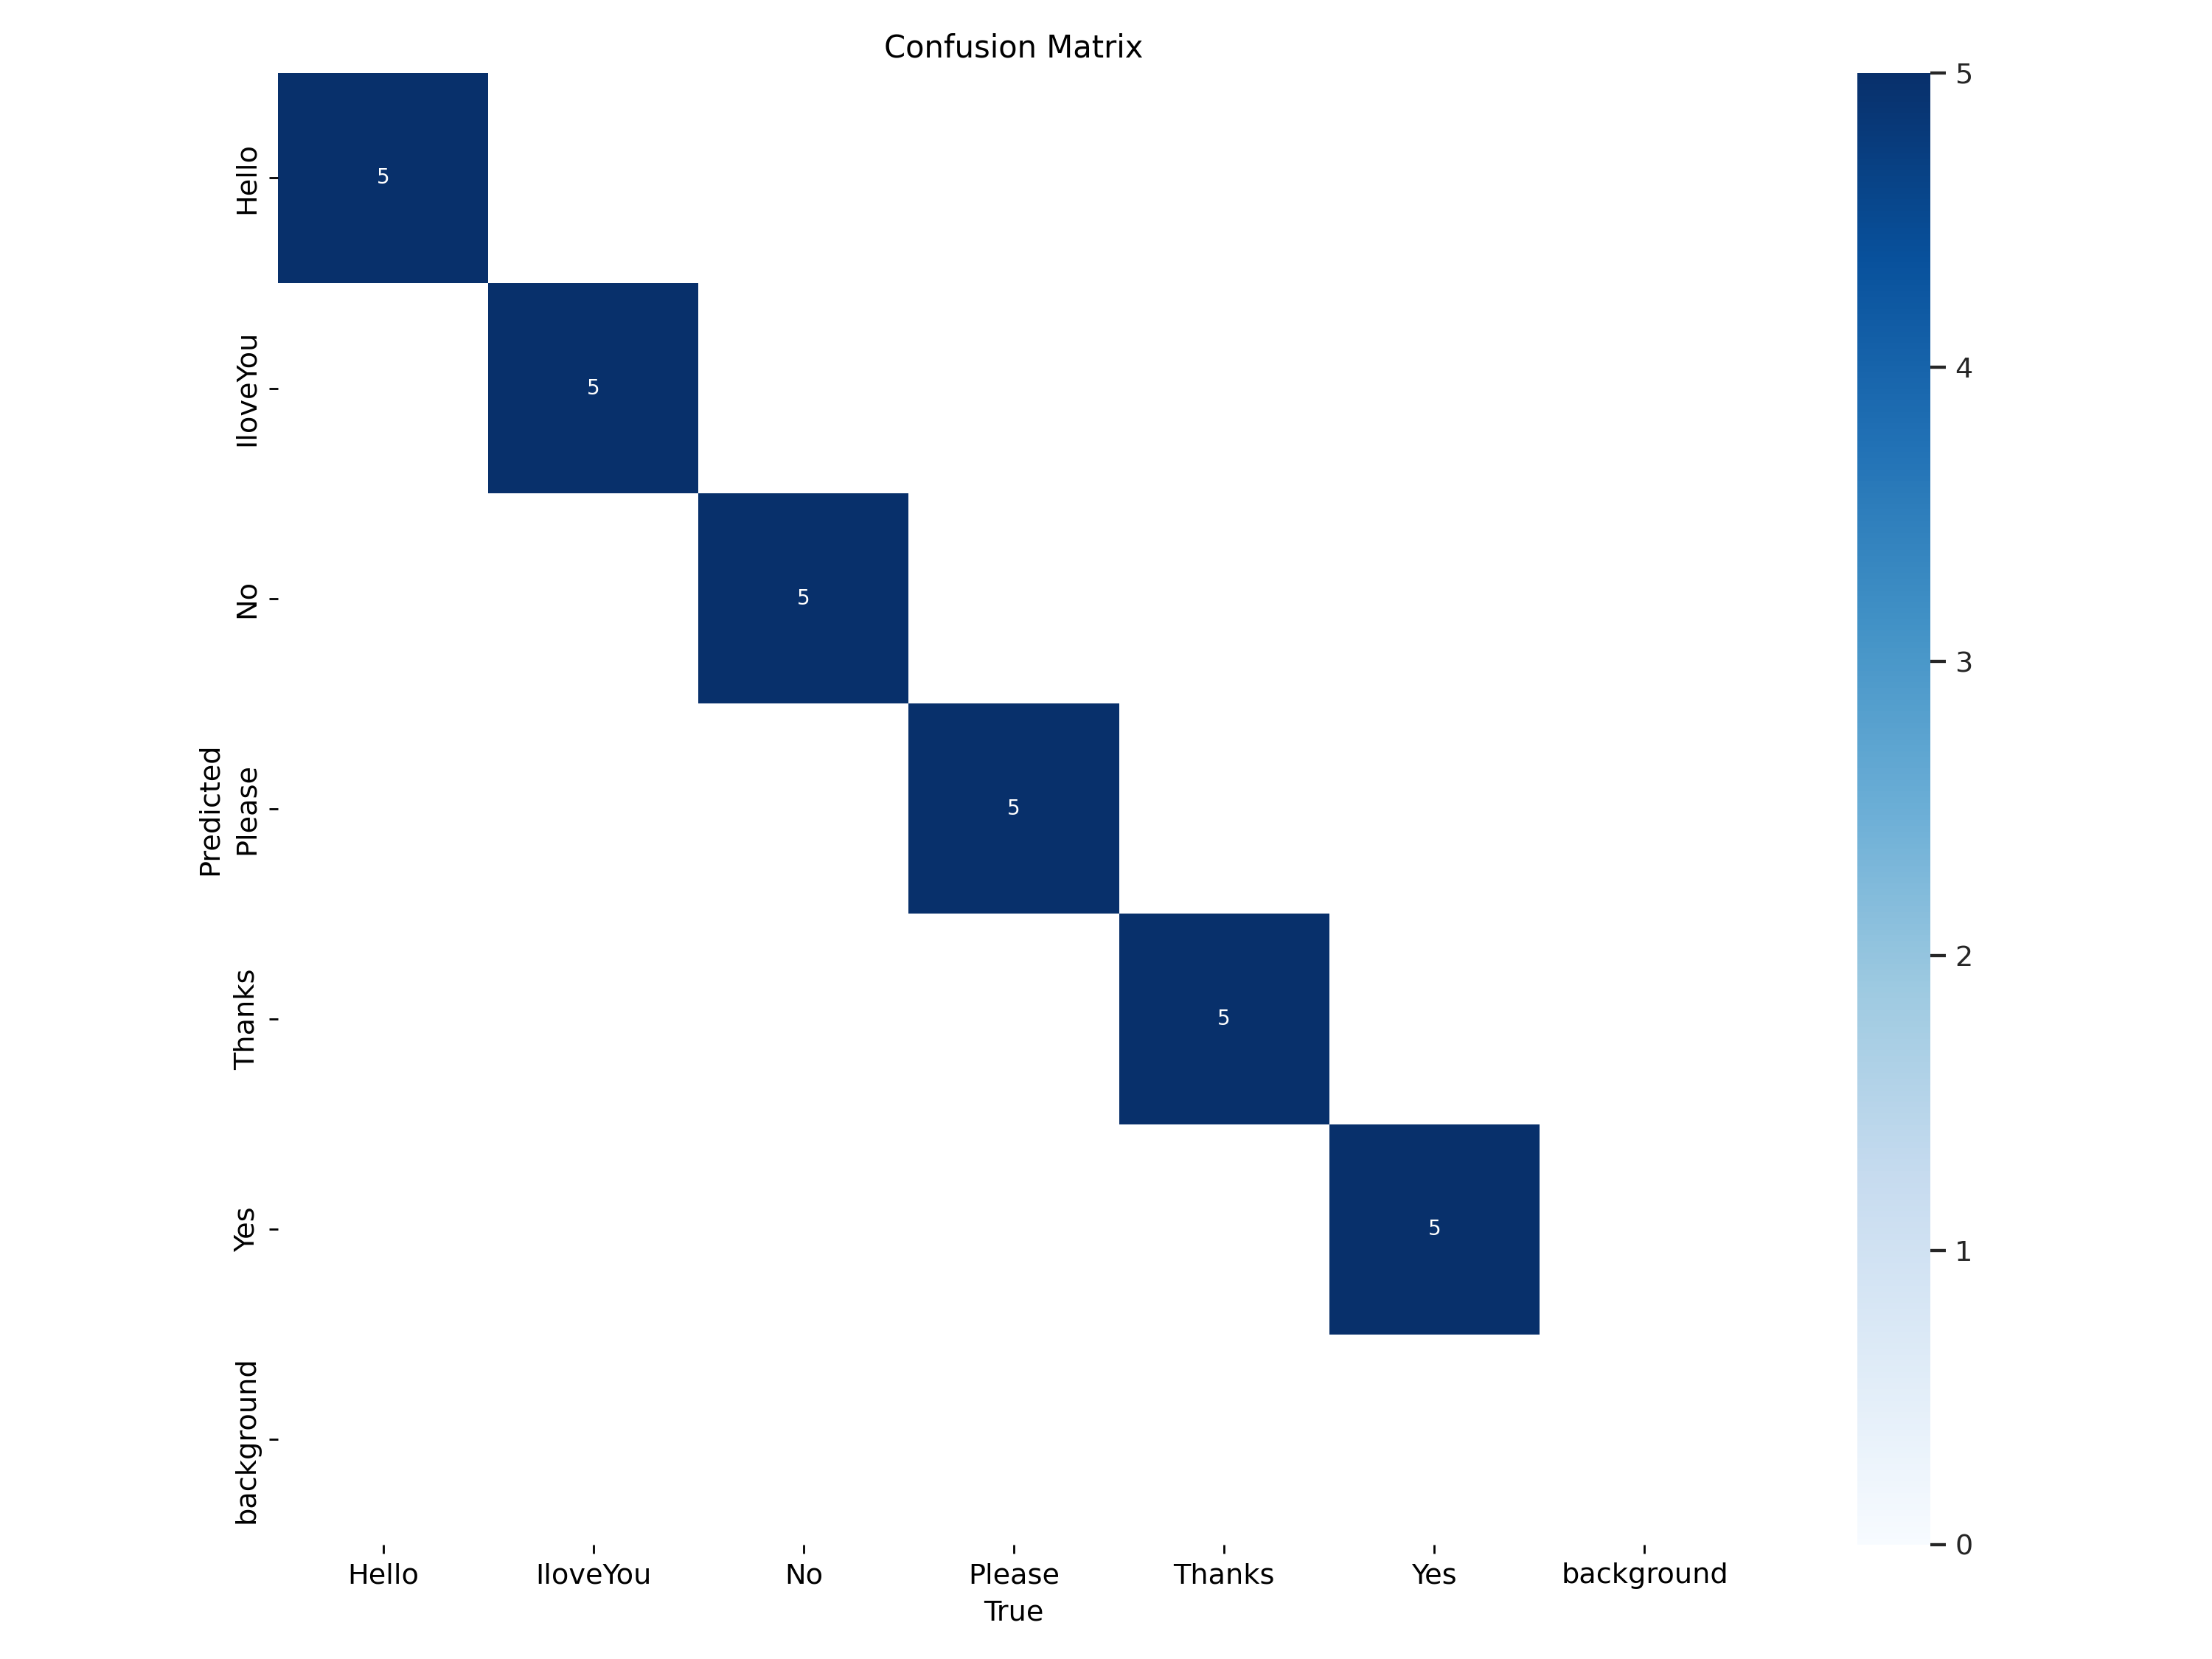

In [31]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

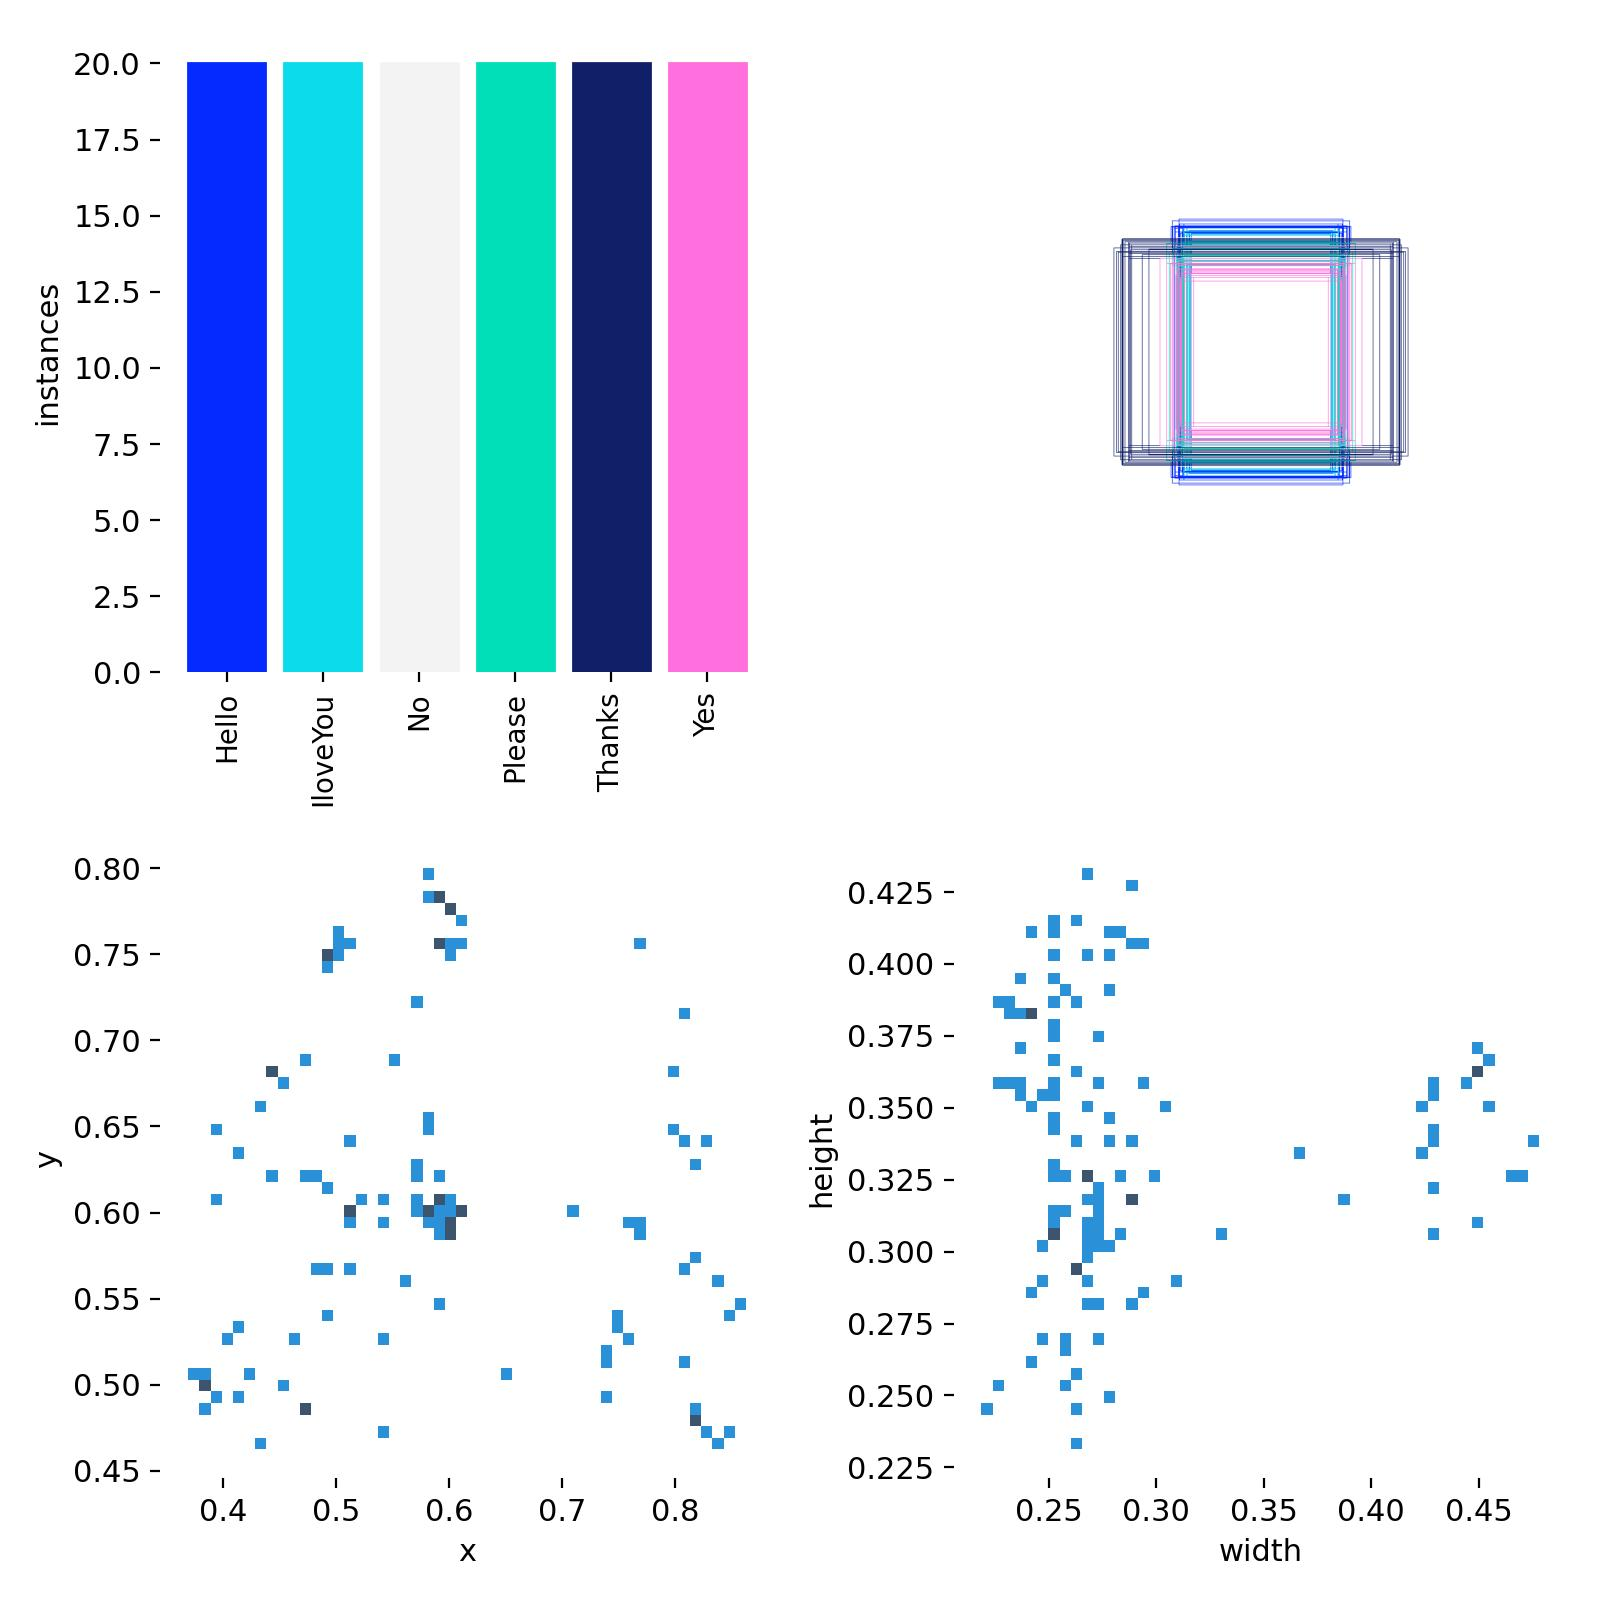

In [30]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

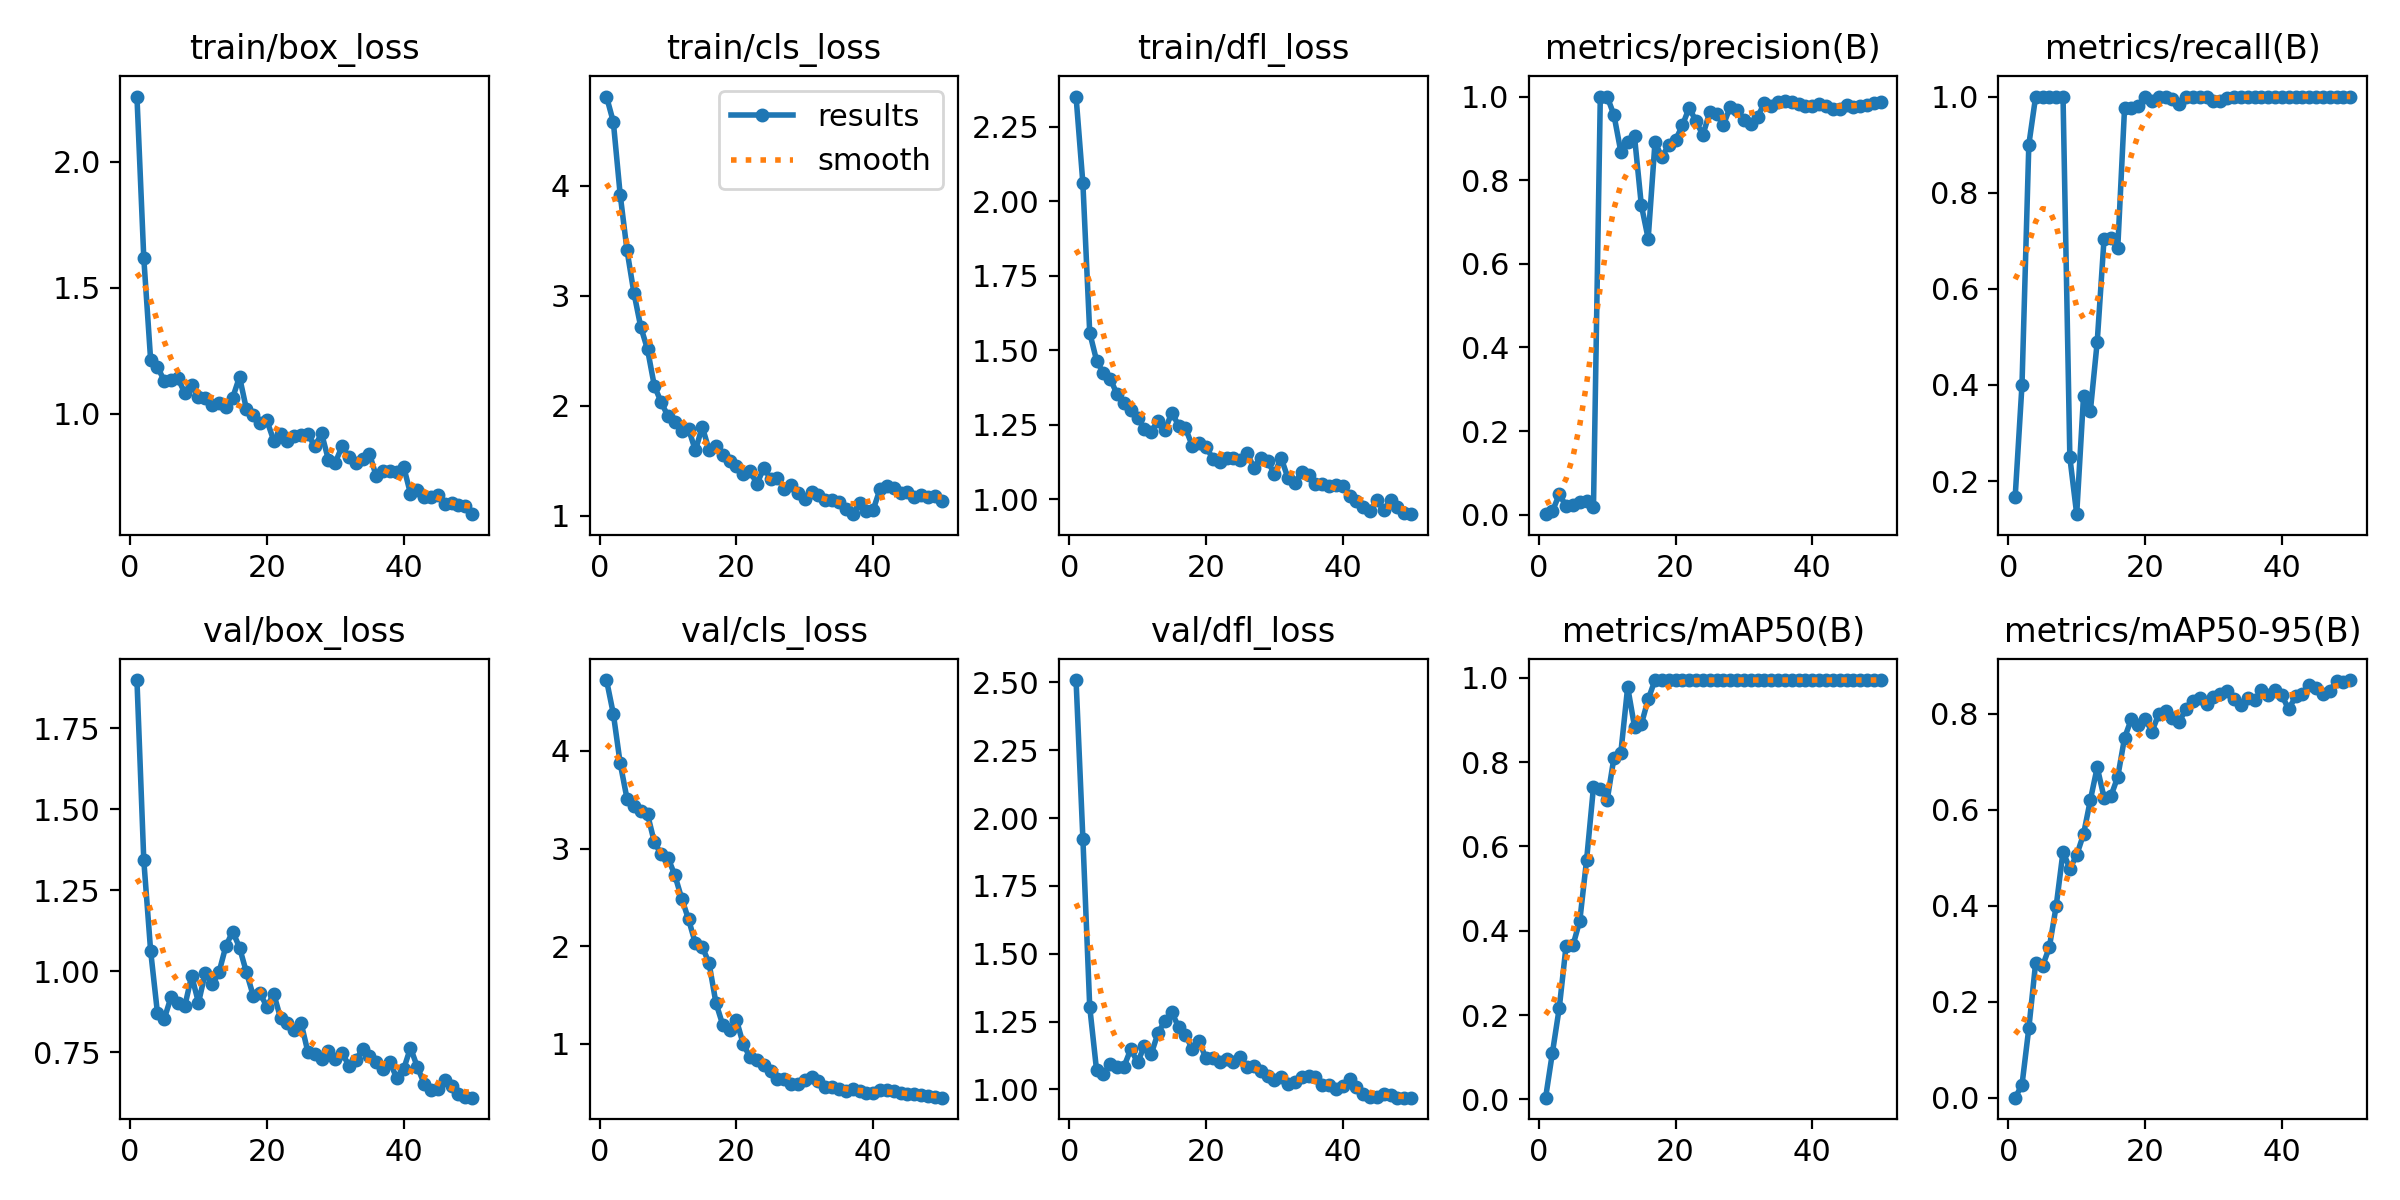

In [29]:
Image("/content/runs/detect/train2/results.png", width=600)

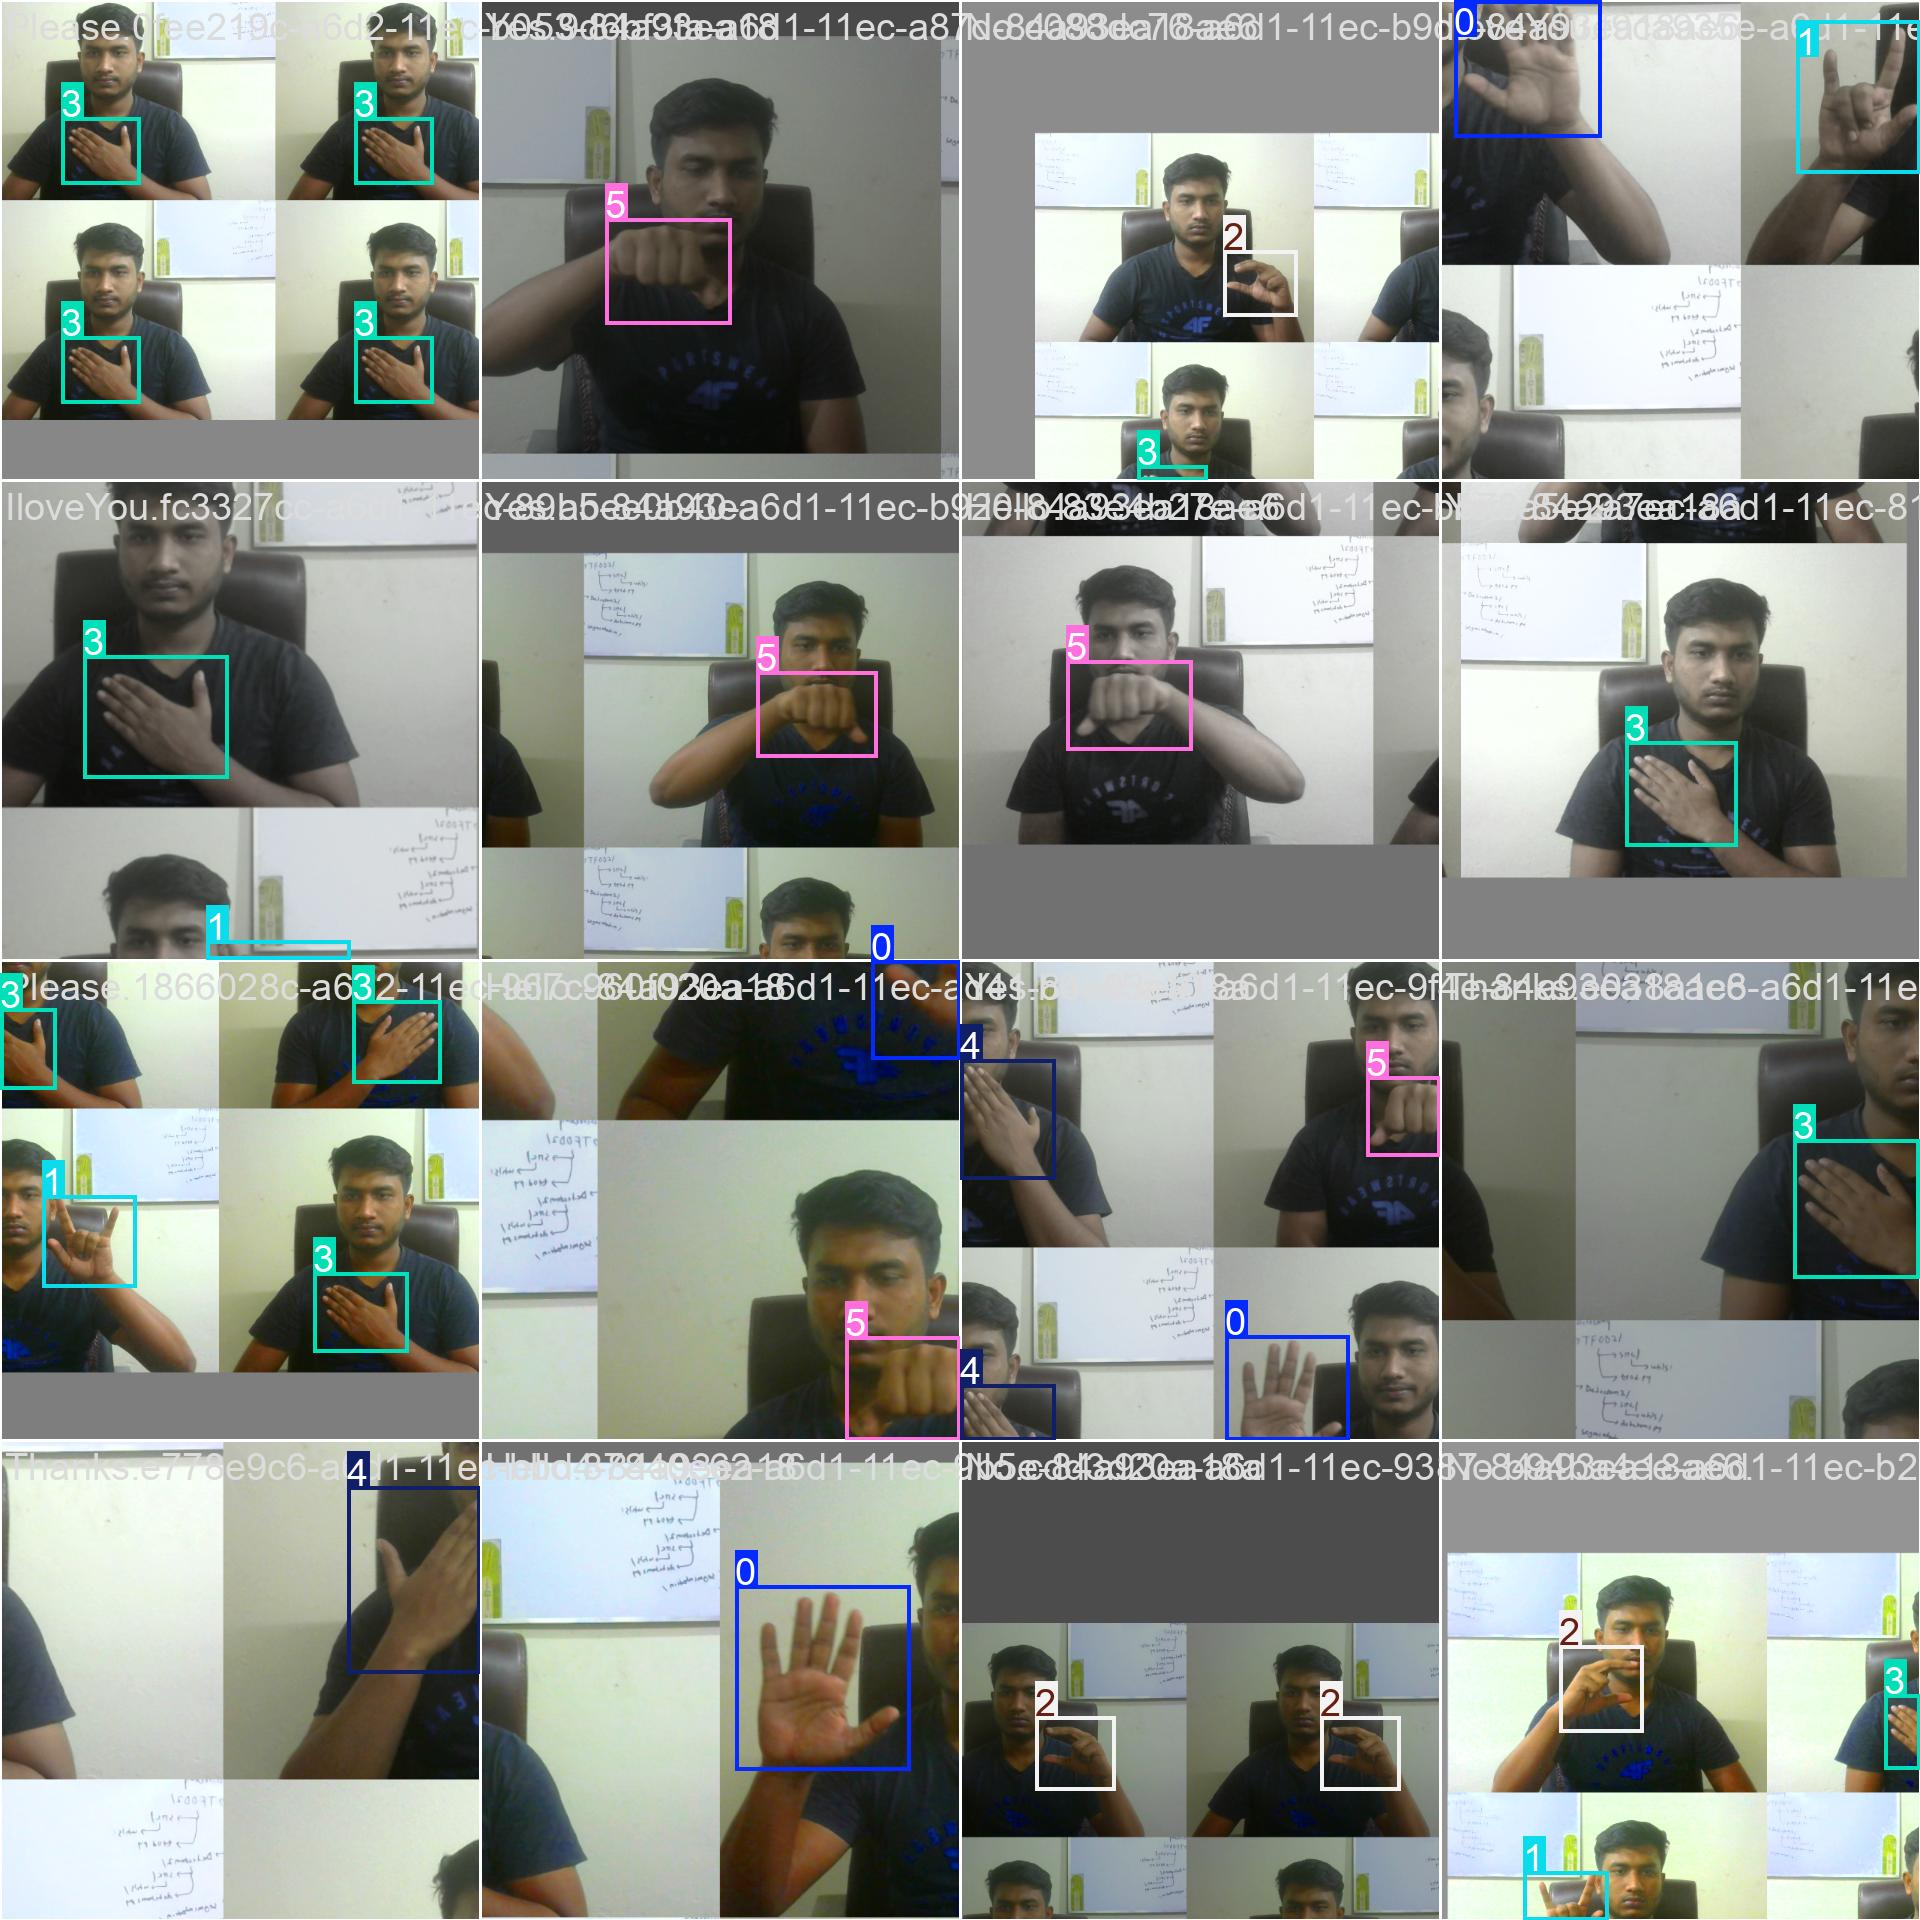

In [28]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

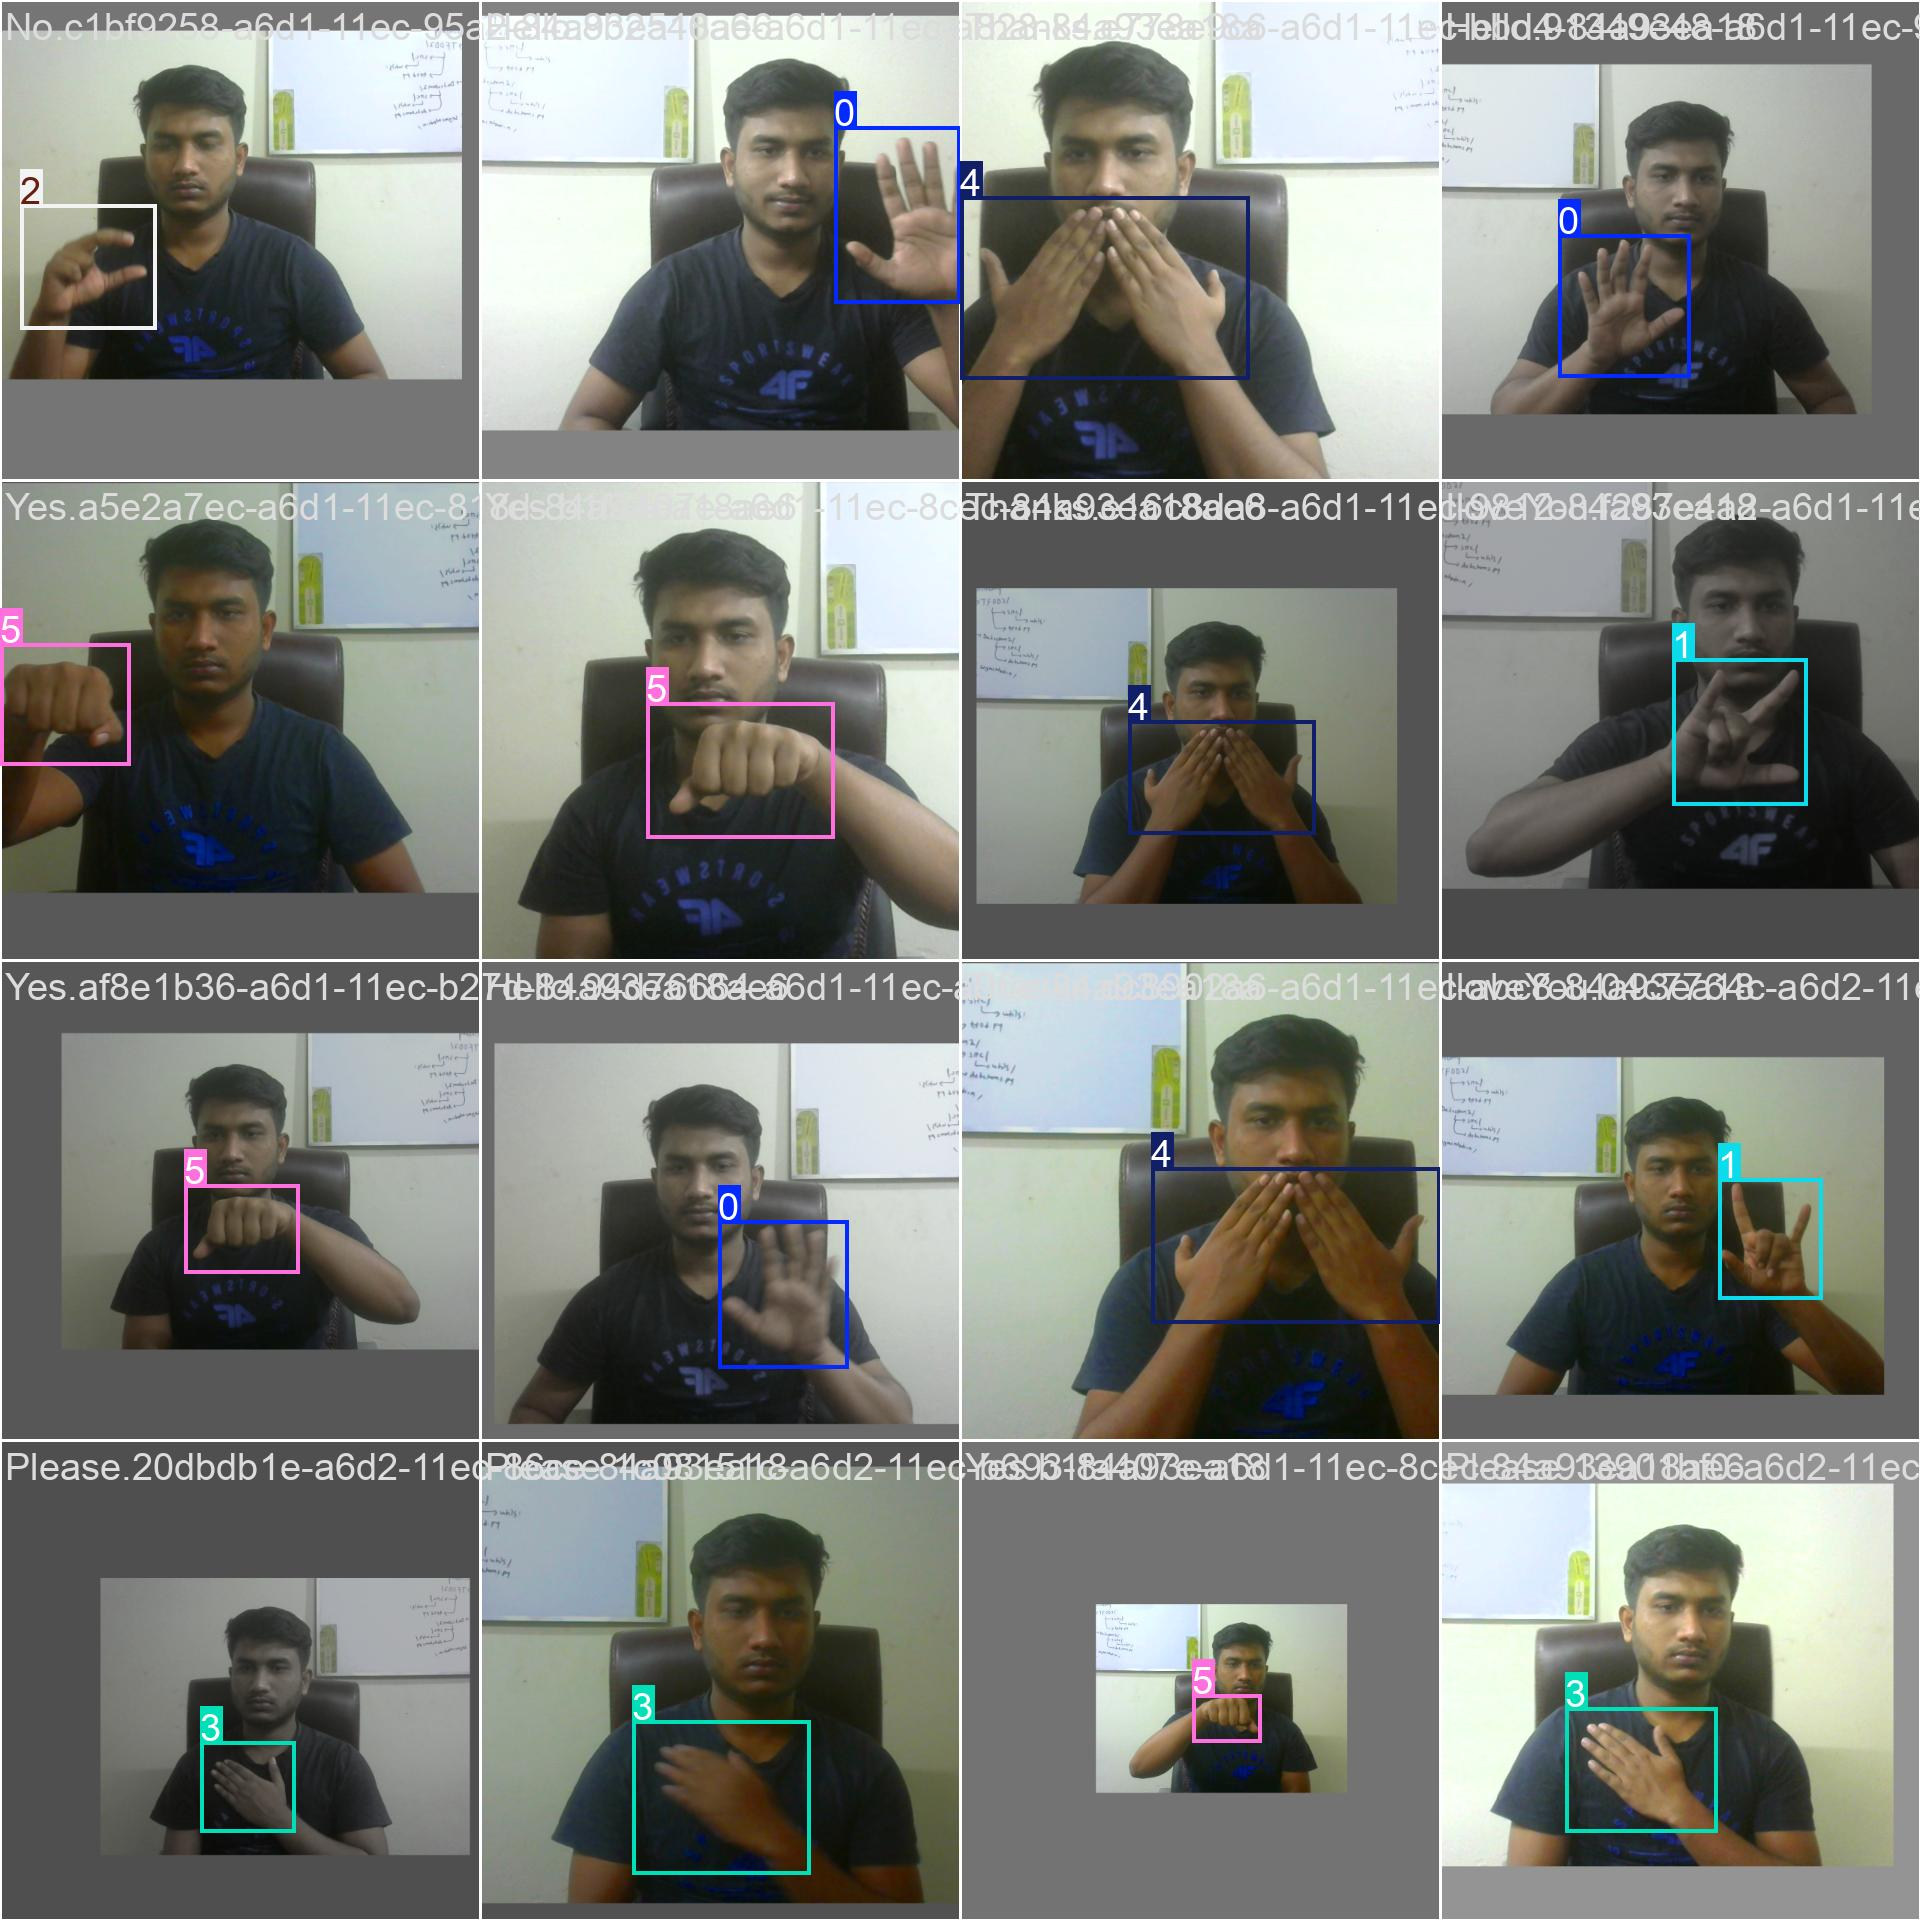

In [34]:
Image("/content/runs/detect/train2/train_batch322.jpg", width=600)

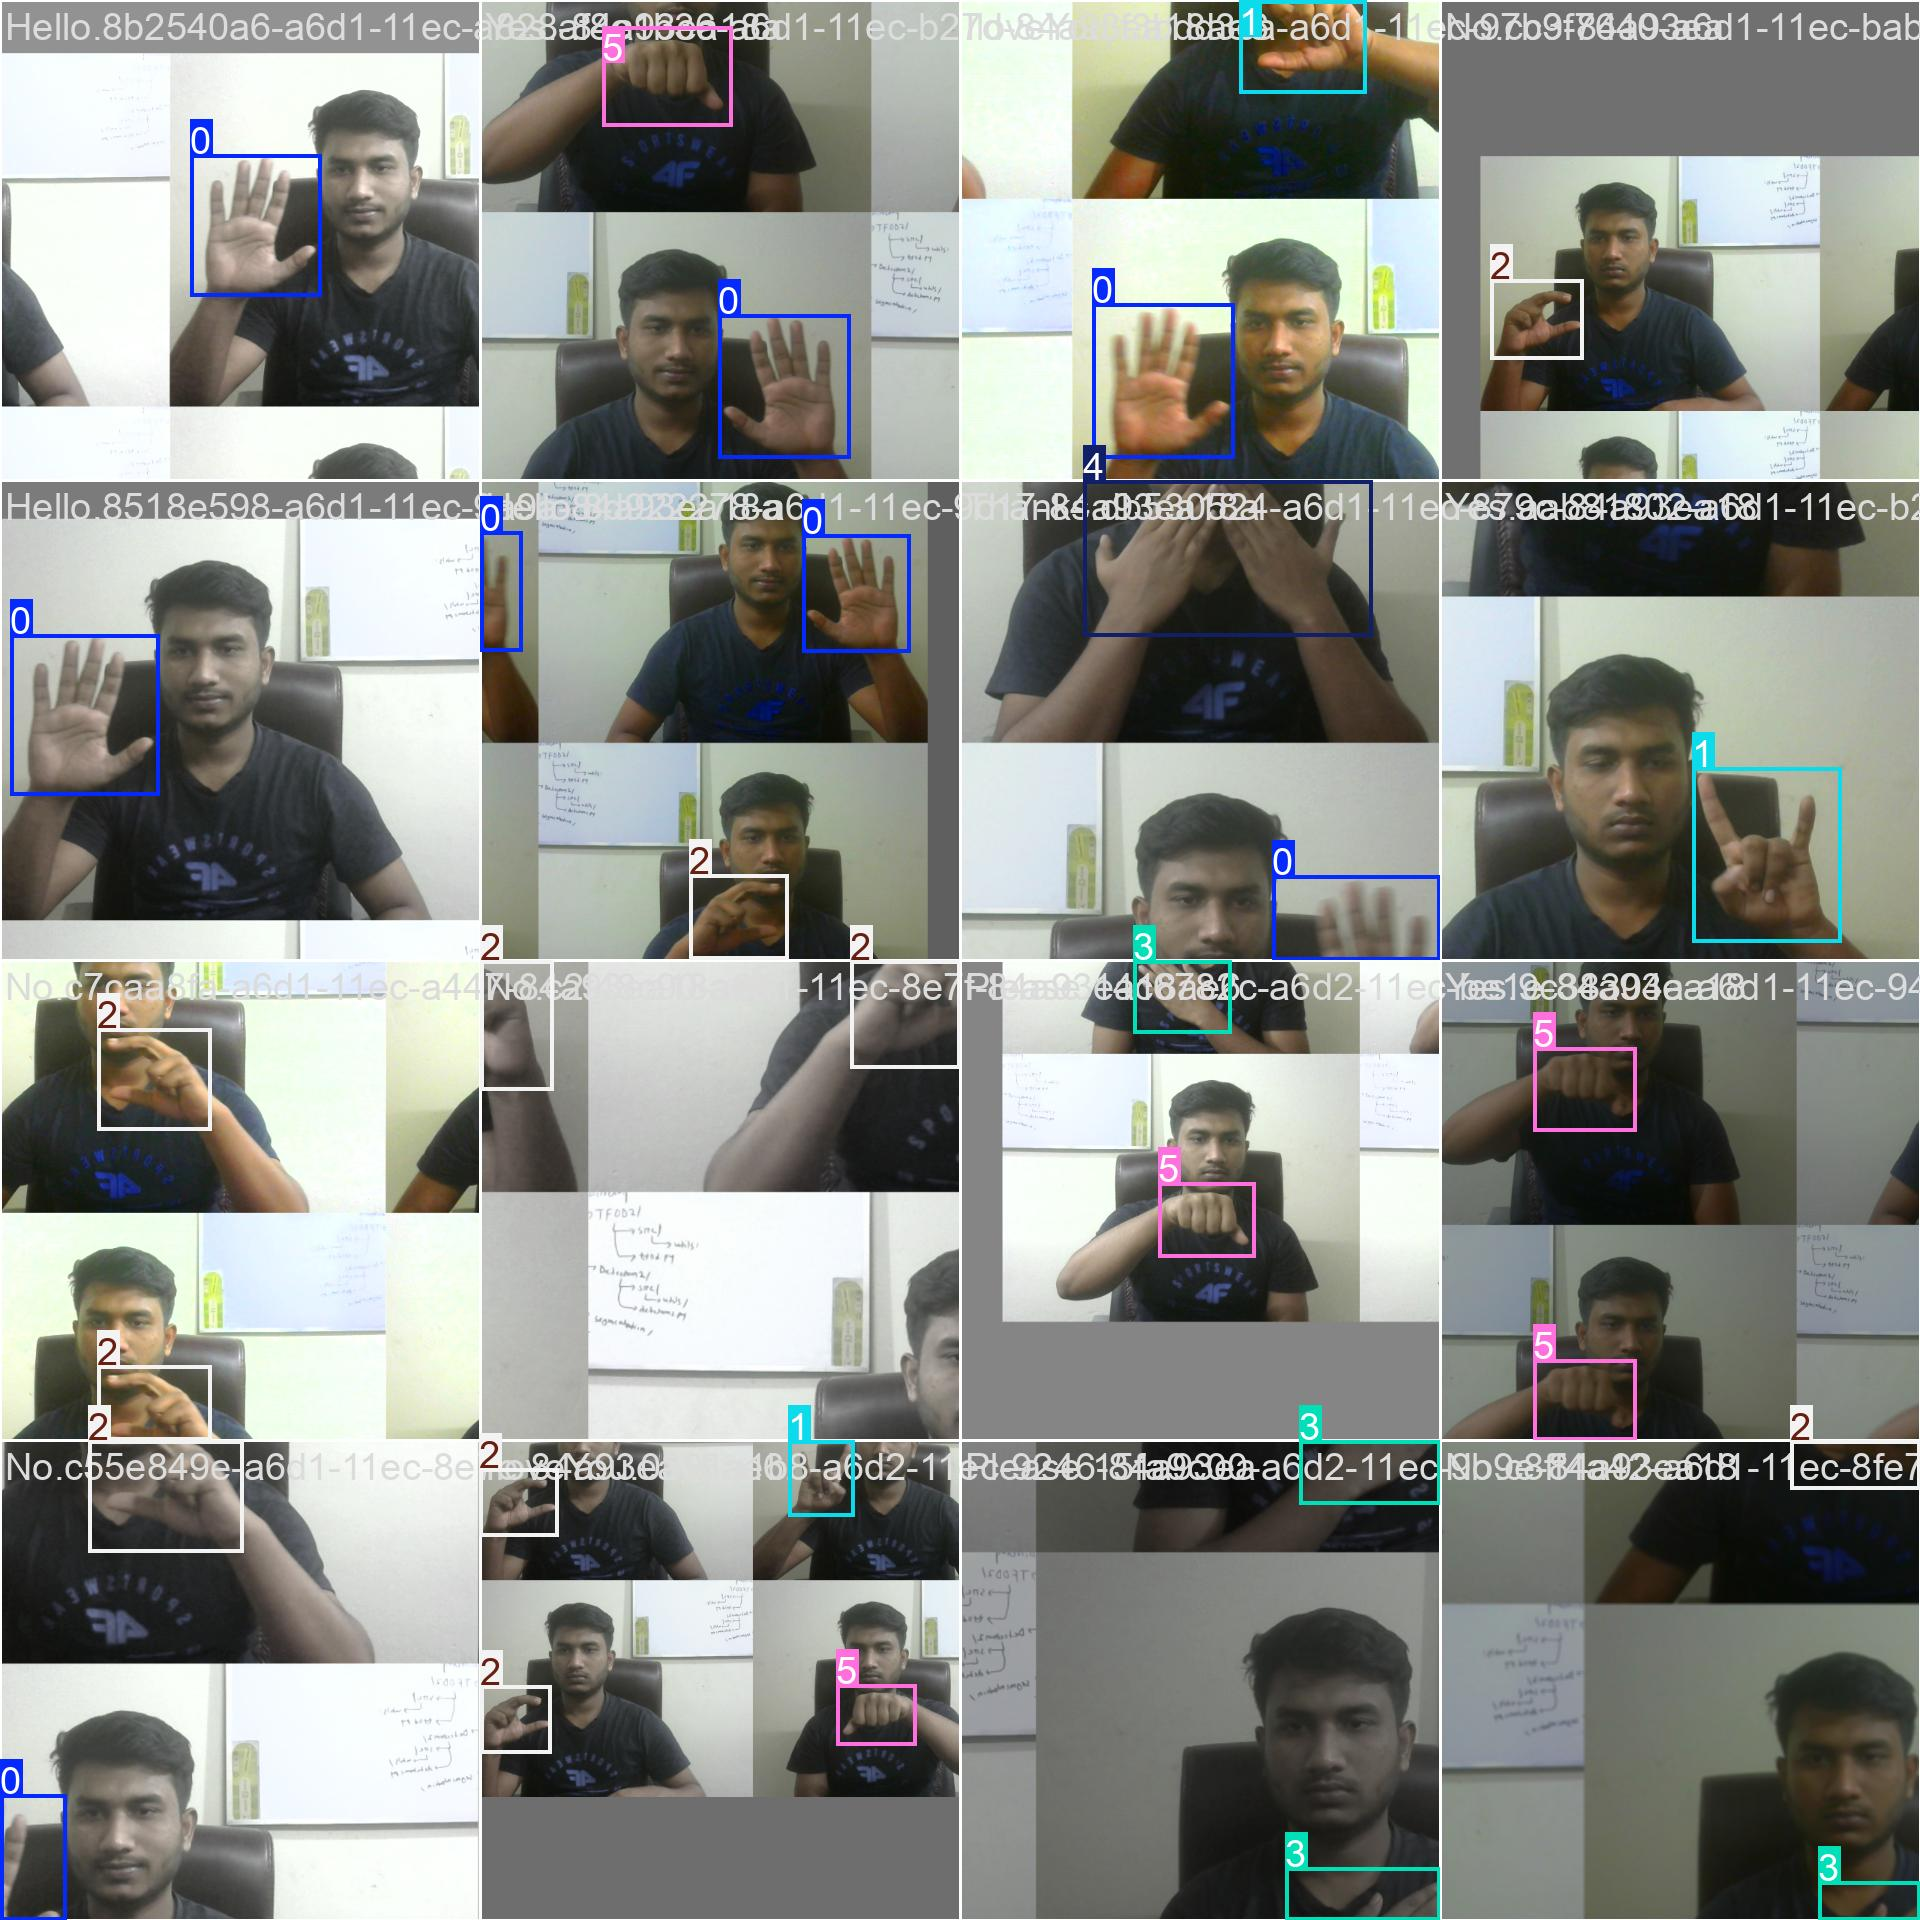

In [27]:
Image("/content/runs/detect/train2/train_batch1.jpg", width=600)

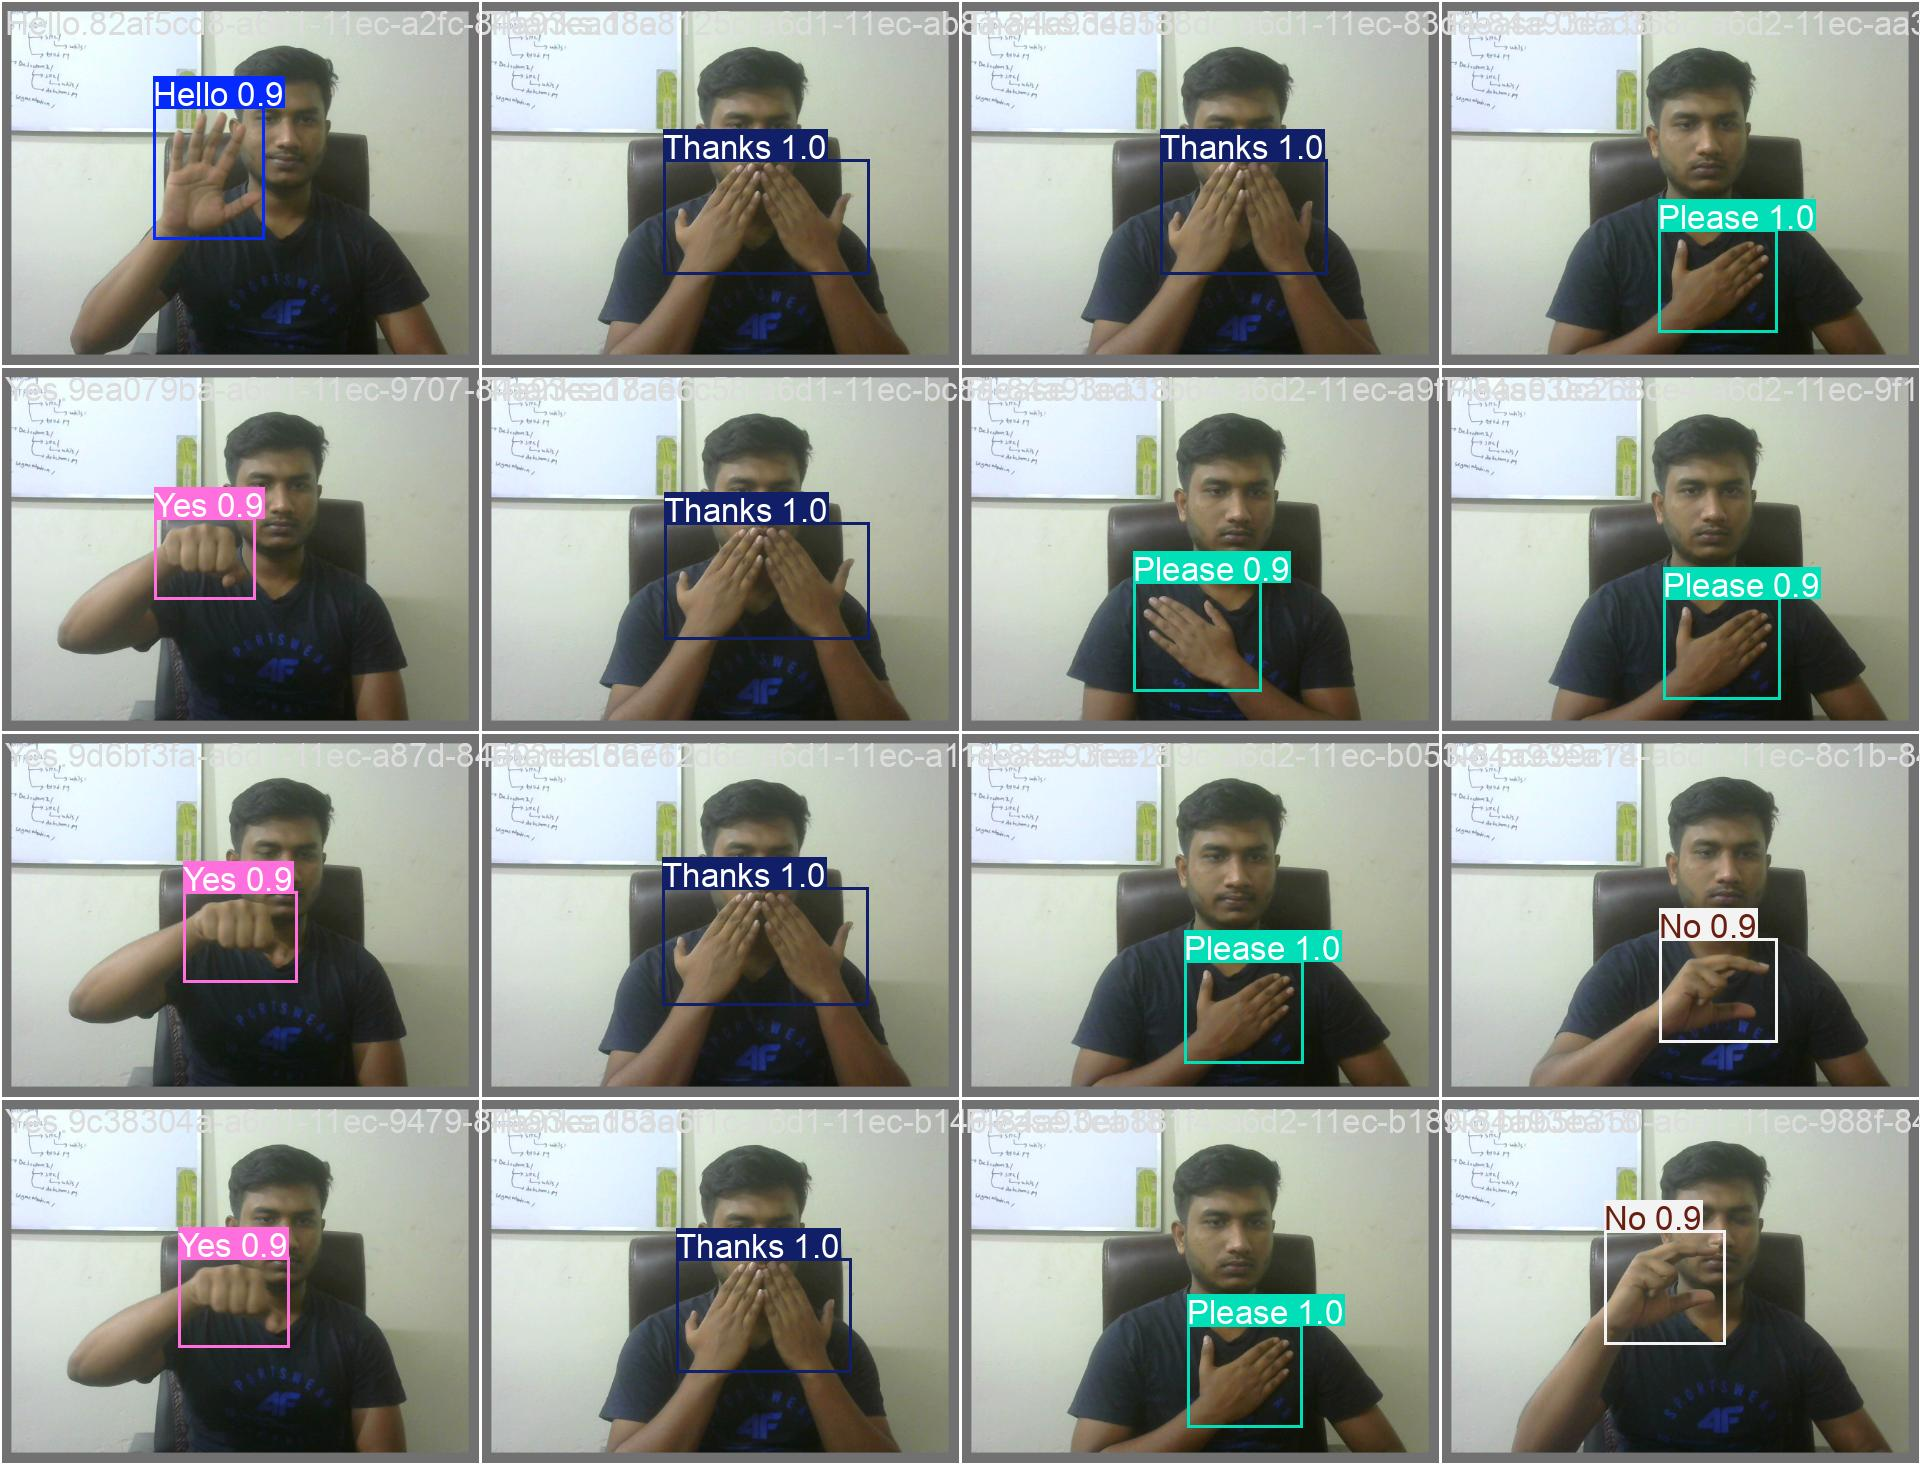

In [26]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

**Step # 08 Inference with Custom Model on Images**

In [35]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/test/images" save=True

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/30 /content/test/images/Hello.82af5cd8-a6d1-11ec-a2fc-84a93ea18ae6.jpg: 480x640 1 Hello, 86.1ms
image 2/30 /content/test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6 - Copy.jpg: 480x640 1 Hello, 14.9ms
image 3/30 /content/test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6.jpg: 480x640 1 Hello, 13.3ms
image 4/30 /content/test/images/Hello.8c5b98c8-a6d1-11ec-a905-84a93ea18ae6.jpg: 480x640 1 Hello, 7.6ms
image 5/30 /content/test/images/Hello.8d922278-a6d1-11ec-9c17-84a93ea18ae6.jpg: 480x640 1 Hello, 7.8ms
image 6/30 /content/test/images/IloveYou.01279dee-a6d2-11ec-a775-84a93ea18ae6.jpg: 480x640 1 IloveYou, 7.5ms
image 7/30 /content/test/images/IloveYou.0391a1b8-a6d2-11ec-9246-84a93ea18ae6.jpg: 480x640 1 IloveYou, 7.4ms
image 8/30 /content/test/images/IloveYou.04c7764c-a6d2-11ec-998a-84a93ea18ae6 - Copy.jpg: 4

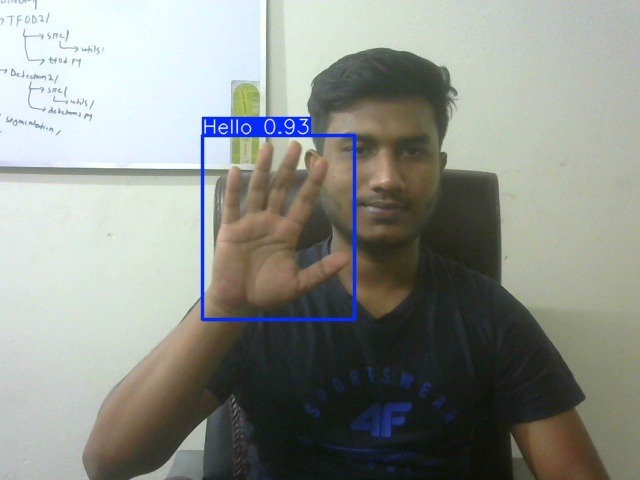

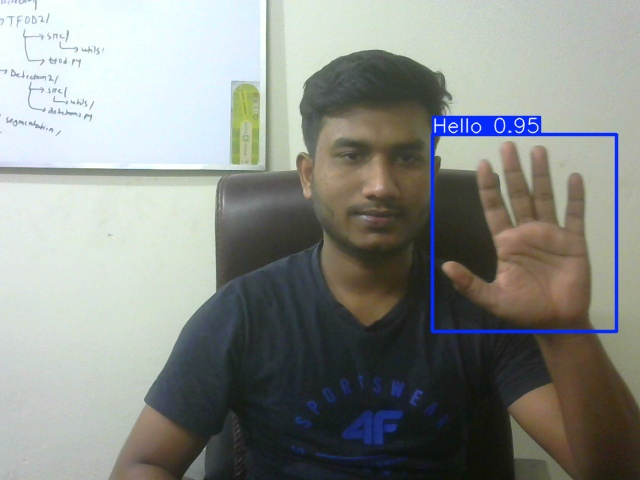

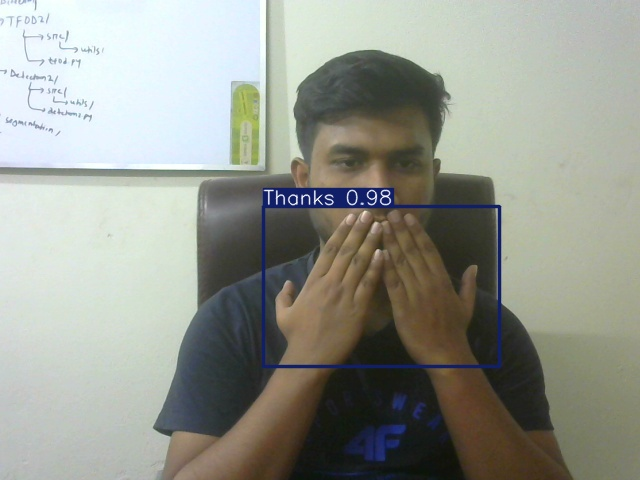

In [36]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [43]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/WIN_20250121_22_15_21_Pro.jpg" save=True

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/WIN_20250121_22_15_21_Pro.jpg: 384x640 1 Hello, 53.6ms
Speed: 3.8ms preprocess, 53.6ms inference, 582.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


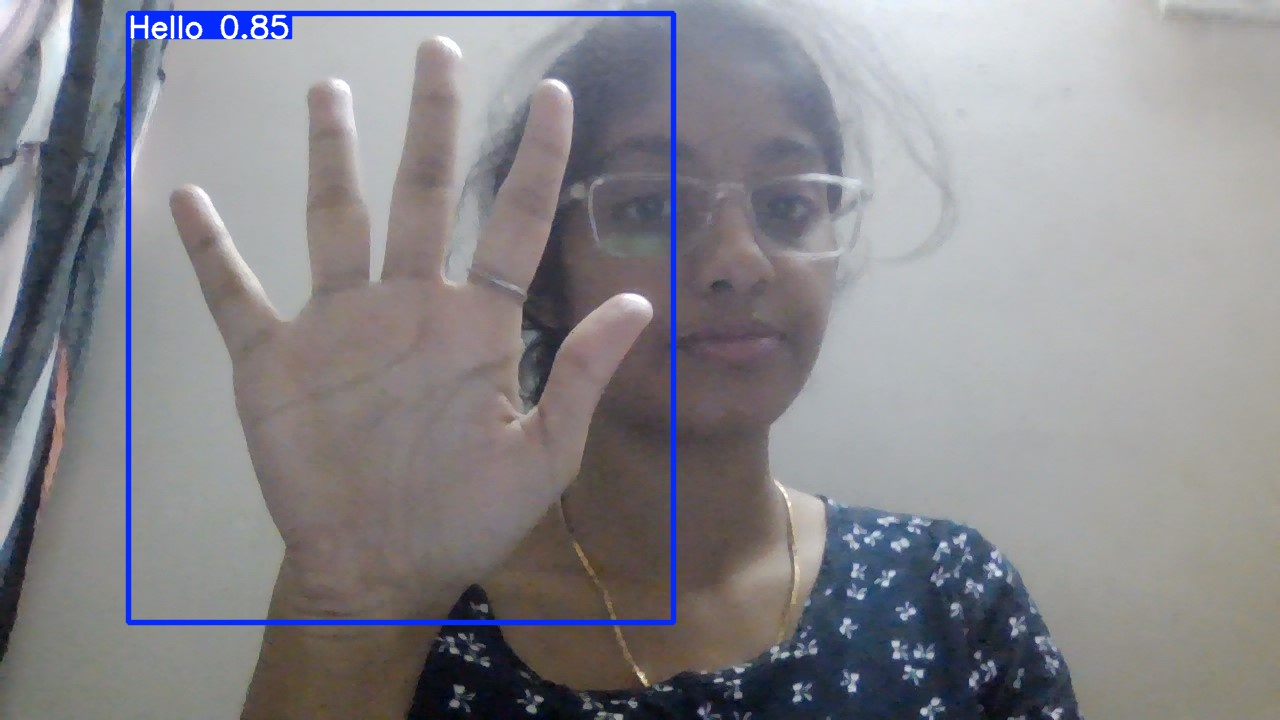

In [45]:
Image("/content/runs/detect/predict8/WIN_20250121_22_15_21_Pro.jpg", width=600)

In [47]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Now you can save the model
model.save('model.keras')